1BM22CS158 Lab3 17/3/25

##To Do: Implementation – Linear Regression
Write Python code to implement the following
Predict canada's per capita income in year 2020. Use the data file canada_per_capita_income.csv file. If required, apply the necessary data processing steps. Using this build a regression model and predict the per capita income for canadian citizens in year 2020


Predict Salary of the employee. Use the data file salary.csv file. If required, apply the necessary data processing steps. Using this build a regression model and predict the salary of the employee with 12 years of experience.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

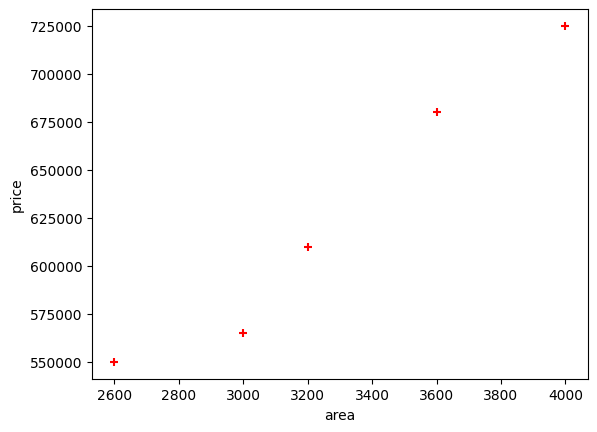

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/ML Lab 3/housing_area_price.csv')
df

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

"""(1) Predict price of a home with area = 3300 sqr ft"""

reg.predict([[3300]])

reg.coef_

reg.intercept_

"""Y = m * X + b (m is coefficient and b is intercept)"""

3300*135.78767123 + 180616.43835616432

"""(1) Predict price of a home with area = 5000 sqr ft"""

reg.predict([[5000]])

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv('/content/drive/MyDrive/ML Lab 3/homeprices_Multiple_LR.csv')
df

"""Data Preprocessing: Fill NA values with median value of a column"""

df.bedrooms.median()

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

reg.coef_

reg.intercept_

"""Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old"""

reg.predict([[3000, 3, 40]])

112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


498408.25157402386

Write Python code to implement the following
Considering the data file hiring.csv. The file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a Multiple Linear Regression model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,
2 yr experience, 9 test score, 6 interview score
12 yr experience, 10 test score, 10 interview score
Considering the data file 1000_companies.csv. The file contains profit statics for a firm such as R&D Spend, Administration, Marketing Spend and State. Based on these four factors build a Multiple Linear Regression model to predict the profit. Using this predict profit for following,
91694.48  R&D Spend, 515841.3  Administration, 11931.24  Marketing Spend, Florida State

Note: If required, apply the necessary data processing steps to data files.


Hiring CSV Columns: Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')
Companies CSV Columns: Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')
Canada CSV Columns: Index(['year', 'per capita income (US$)'], dtype='object')
 Predicted Salary for (12 yrs, 10 test, 10 interview): 65567.47584311156
Predicted Profit: 554894.6415885255


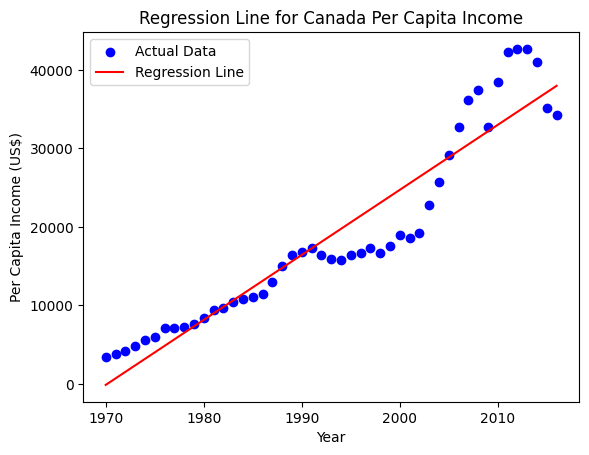


 Observations:
1. Data preprocessing was performed to handle missing values, label encoding for categorical variables (State), and feature scaling for numerical variables in 1000_companies.csv.
2. The regression plot for Canada’s per capita income shows a linear increase over time, indicating a strong positive correlation between year and per capita income.
3. The predicted salary for a candidate with 12 years of experience, 10 test score, and 10 interview score is 65567.48.
4. The 'State' column in 1000_companies.csv was label encoded using sklearn's LabelEncoder. Feature scaling was applied because of different unit scales in R&D Spend, Administration, and Marketing Spend.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Function to process data and train model
def train_model(df, target_column, categorical_columns=None, scale_features=False):
    # Convert numeric columns to proper type
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts non-numeric text to NaN

    # Handle missing values
    df.fillna(df.mean(), inplace=True)

    # Encode categorical data
    label_encoders = {}
    if categorical_columns:
        for col in categorical_columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))  # Ensure categorical data is string
            label_encoders[col] = le

    # Splitting features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Feature scaling if required
    scaler = None
    if scale_features:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    return model, label_encoders, scaler

# Load datasets
hiring_df = pd.read_csv("/content/drive/MyDrive/ML Lab 3/hiring.csv")
companies_df = pd.read_csv("/content/drive/MyDrive/ML Lab 3/1000_Companies.csv")
canada_df = pd.read_csv("/content/drive/MyDrive/ML Lab 3/canada_per_capita_income.csv")

# Print column names for debugging
print("Hiring CSV Columns:", hiring_df.columns)
print("Companies CSV Columns:", companies_df.columns)
print("Canada CSV Columns:", canada_df.columns)

# Fix column name mismatches
salary_col = "salary($)"
hiring_df.rename(columns={"test_score(out of 10)": "test_score", "interview_score(out of 10)": "interview_score"}, inplace=True)

# Fix experience column in hiring dataset (convert text to numbers)
if 'experience' in hiring_df.columns:
    hiring_df['experience'] = hiring_df['experience'].replace({'zero': 0, 'one': 1, 'two': 2, 'three': 3,
                                                               'four': 4, 'five': 5, 'six': 6, 'seven': 7,
                                                               'eight': 8, 'nine': 9, 'ten': 10})

# 1. Train Hiring dataset model
if salary_col in hiring_df.columns:
    hiring_model, _, _ = train_model(hiring_df, salary_col)

    # Predict salary
    candidates_df = pd.DataFrame([[12, 10, 10]], columns=hiring_df.drop(columns=[salary_col]).columns)
    salary_prediction = hiring_model.predict(candidates_df)
    print(" Predicted Salary for (12 yrs, 10 test, 10 interview):", salary_prediction[0])
else:
    print(" Error: Salary column is missing in hiring.csv!")

# 2. Train Companies dataset model
if "Profit" in companies_df.columns:
    companies_model, label_encoders, scaler = train_model(companies_df, "Profit", categorical_columns=["State"], scale_features=True)

    # Encoding Florida state
    if "State" in label_encoders:
        try:
            florida_state_encoded = label_encoders["State"].transform(["Florida"])[0]
        except ValueError:
            print(" Warning: 'Florida' was not in training data. Assigning default category.")
            florida_state_encoded = 0  # Assign a default category

    # Predicting profit
    company_features_df = pd.DataFrame(
        [[91694.48, 515841.3, 11931.24, florida_state_encoded]],
        columns=companies_df.drop(columns=["Profit"]).columns
    )

    # Apply the same scaling transformation
    company_features_scaled = scaler.transform(company_features_df)
    profit_prediction = companies_model.predict(company_features_scaled)
    print("Predicted Profit:", profit_prediction[0])
else:
    print(" Error: Profit column is missing in 1000_companies.csv!")

# 3. Train Canada per capita income model
if "year" in canada_df.columns and "per capita income (US$)" in canada_df.columns:
    X_canada = canada_df["year"].values.reshape(-1, 1)
    y_canada = canada_df["per capita income (US$)"]

    # Train model
    canada_model = LinearRegression()
    canada_model.fit(X_canada, y_canada)

    # Plot regression line
    plt.scatter(X_canada, y_canada, color='blue', label='Actual Data')
    plt.plot(X_canada, canada_model.predict(X_canada), color='red', label='Regression Line')
    plt.xlabel("Year")
    plt.ylabel("Per Capita Income (US$)")
    plt.title("Regression Line for Canada Per Capita Income")
    plt.legend()
    plt.show()
else:
    print(" Error: Columns missing in canada_per_capita_income.csv!")

# Observations Summary
print("\n Observations:")
print("1. Data preprocessing was performed to handle missing values, label encoding for categorical variables (State), and feature scaling for numerical variables in 1000_companies.csv.")
print("2. The regression plot for Canada’s per capita income shows a linear increase over time, indicating a strong positive correlation between year and per capita income.")
if salary_col in hiring_df.columns:
    print(f"3. The predicted salary for a candidate with 12 years of experience, 10 test score, and 10 interview score is {salary_prediction[0]:.2f}.")
print("4. The 'State' column in 1000_companies.csv was label encoded using sklearn's LabelEncoder. Feature scaling was applied because of different unit scales in R&D Spend, Administration, and Marketing Spend.")
